## Exploratory Analysis Part

In [2]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

import xgboost as xgb

In [3]:
#Read dataset
df = pd.read_csv('../datasets/Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Types of data that we have.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# I think we have no nulls in our dataset. We can check it:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<AxesSubplot: title={'center': 'RowNumber'}>,
        <AxesSubplot: title={'center': 'CustomerId'}>,
        <AxesSubplot: title={'center': 'CreditScore'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'Balance'}>],
       [<AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>,
        <AxesSubplot: title={'center': 'IsActiveMember'}>],
       [<AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: title={'center': 'Exited'}>, <AxesSubplot: >]],
      dtype=object)

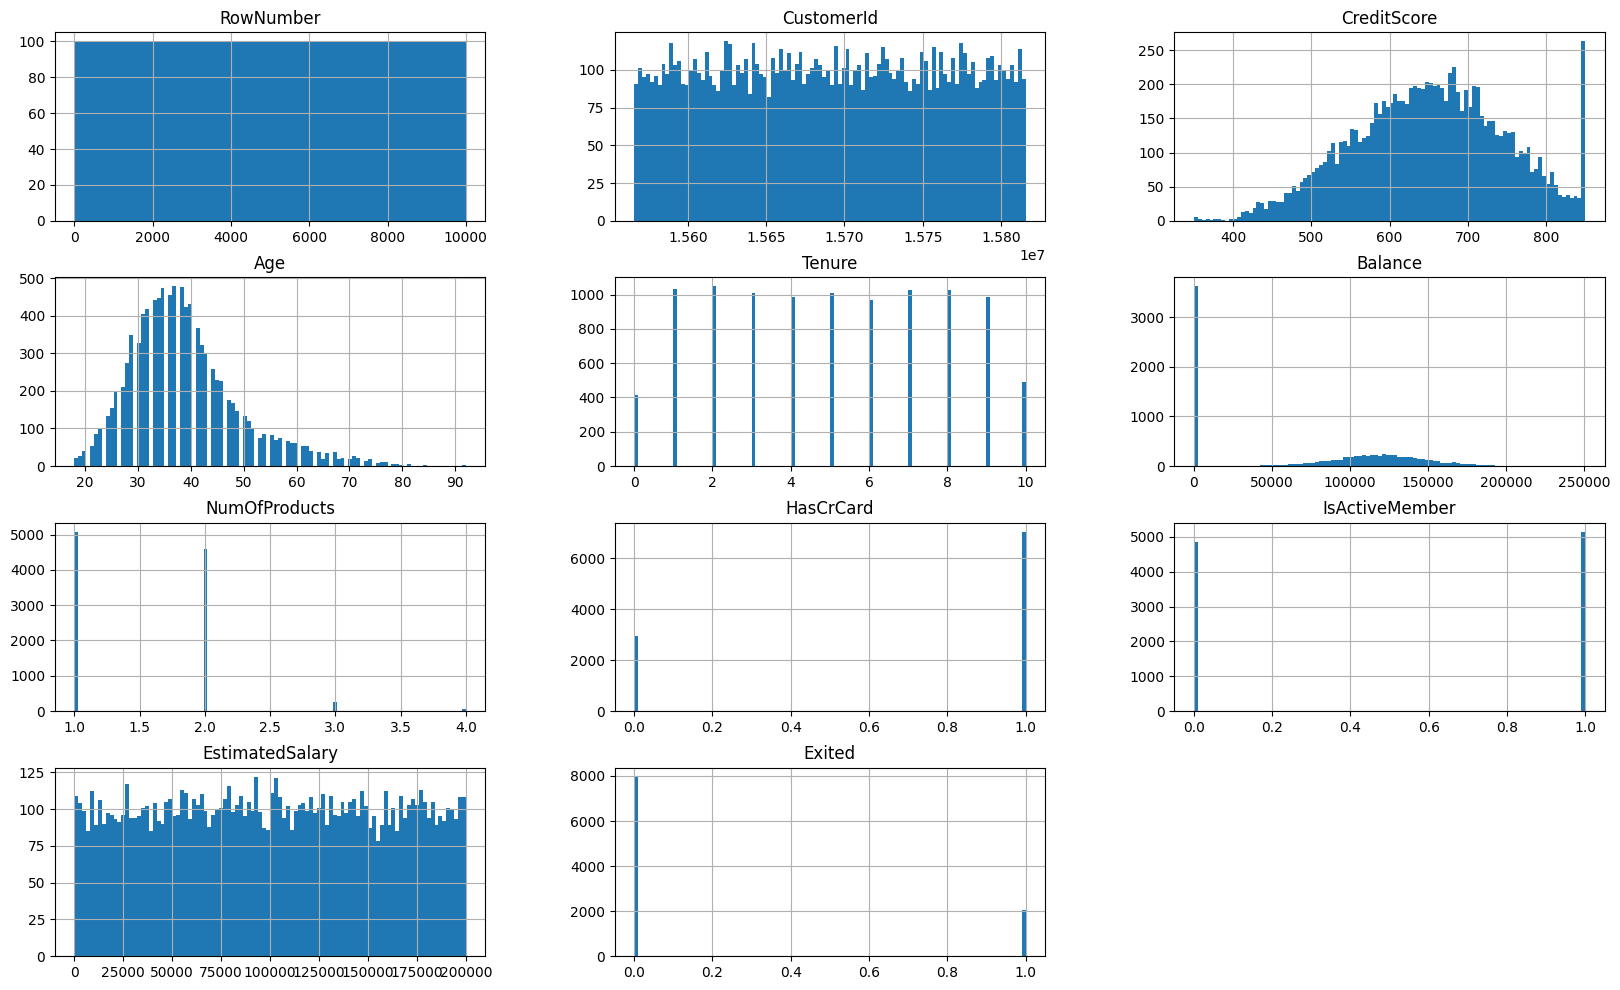

In [7]:
## Histogram plot 
df.hist(figsize=(20,12), bins = 100)

In [8]:
#RowNumber, CustomerId and Surname are not relevant for our analysis.
df_churn = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [9]:
#Checking who left and who stayed in the bank.
df_churn['Exited'].value_counts()
## We have 7963 people who stayed the bank and 2037 people who exited the bank.

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot: xlabel='Exited', ylabel='count'>

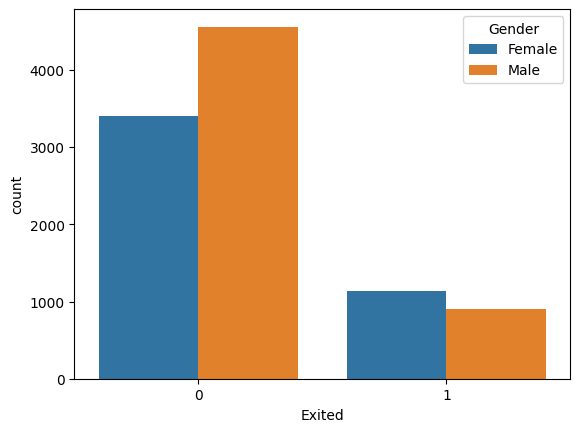

In [10]:
#How the gender is distributed in exited customers.
sns.countplot(x='Exited', hue ='Gender', data = df_churn)
# Men than left are less than womans

<AxesSubplot: xlabel='Age', ylabel='count'>

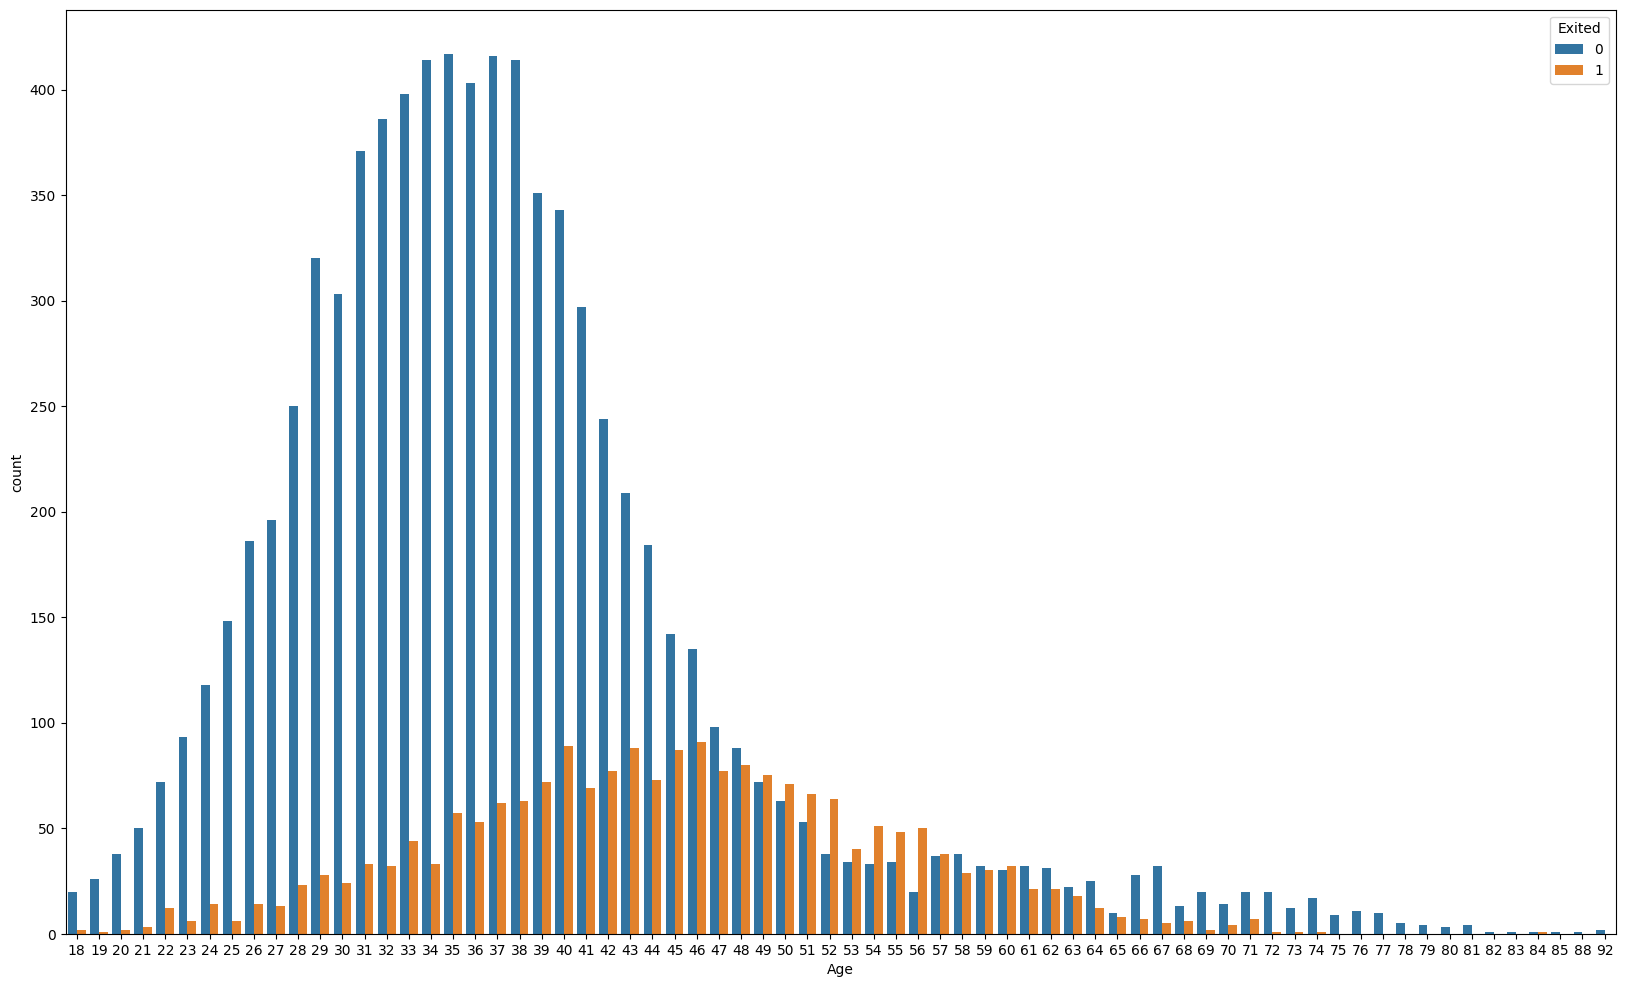

In [11]:
#What about age?
plt.figure(figsize=(20,12))
sns.countplot(x = 'Age', hue = 'Exited', data = df_churn)
#We can see that people who are younger stayed in  the company.

In [12]:
## Variables correlations
corr = df_churn.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_45676\3647647714.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_churn.corr()


<AxesSubplot: >

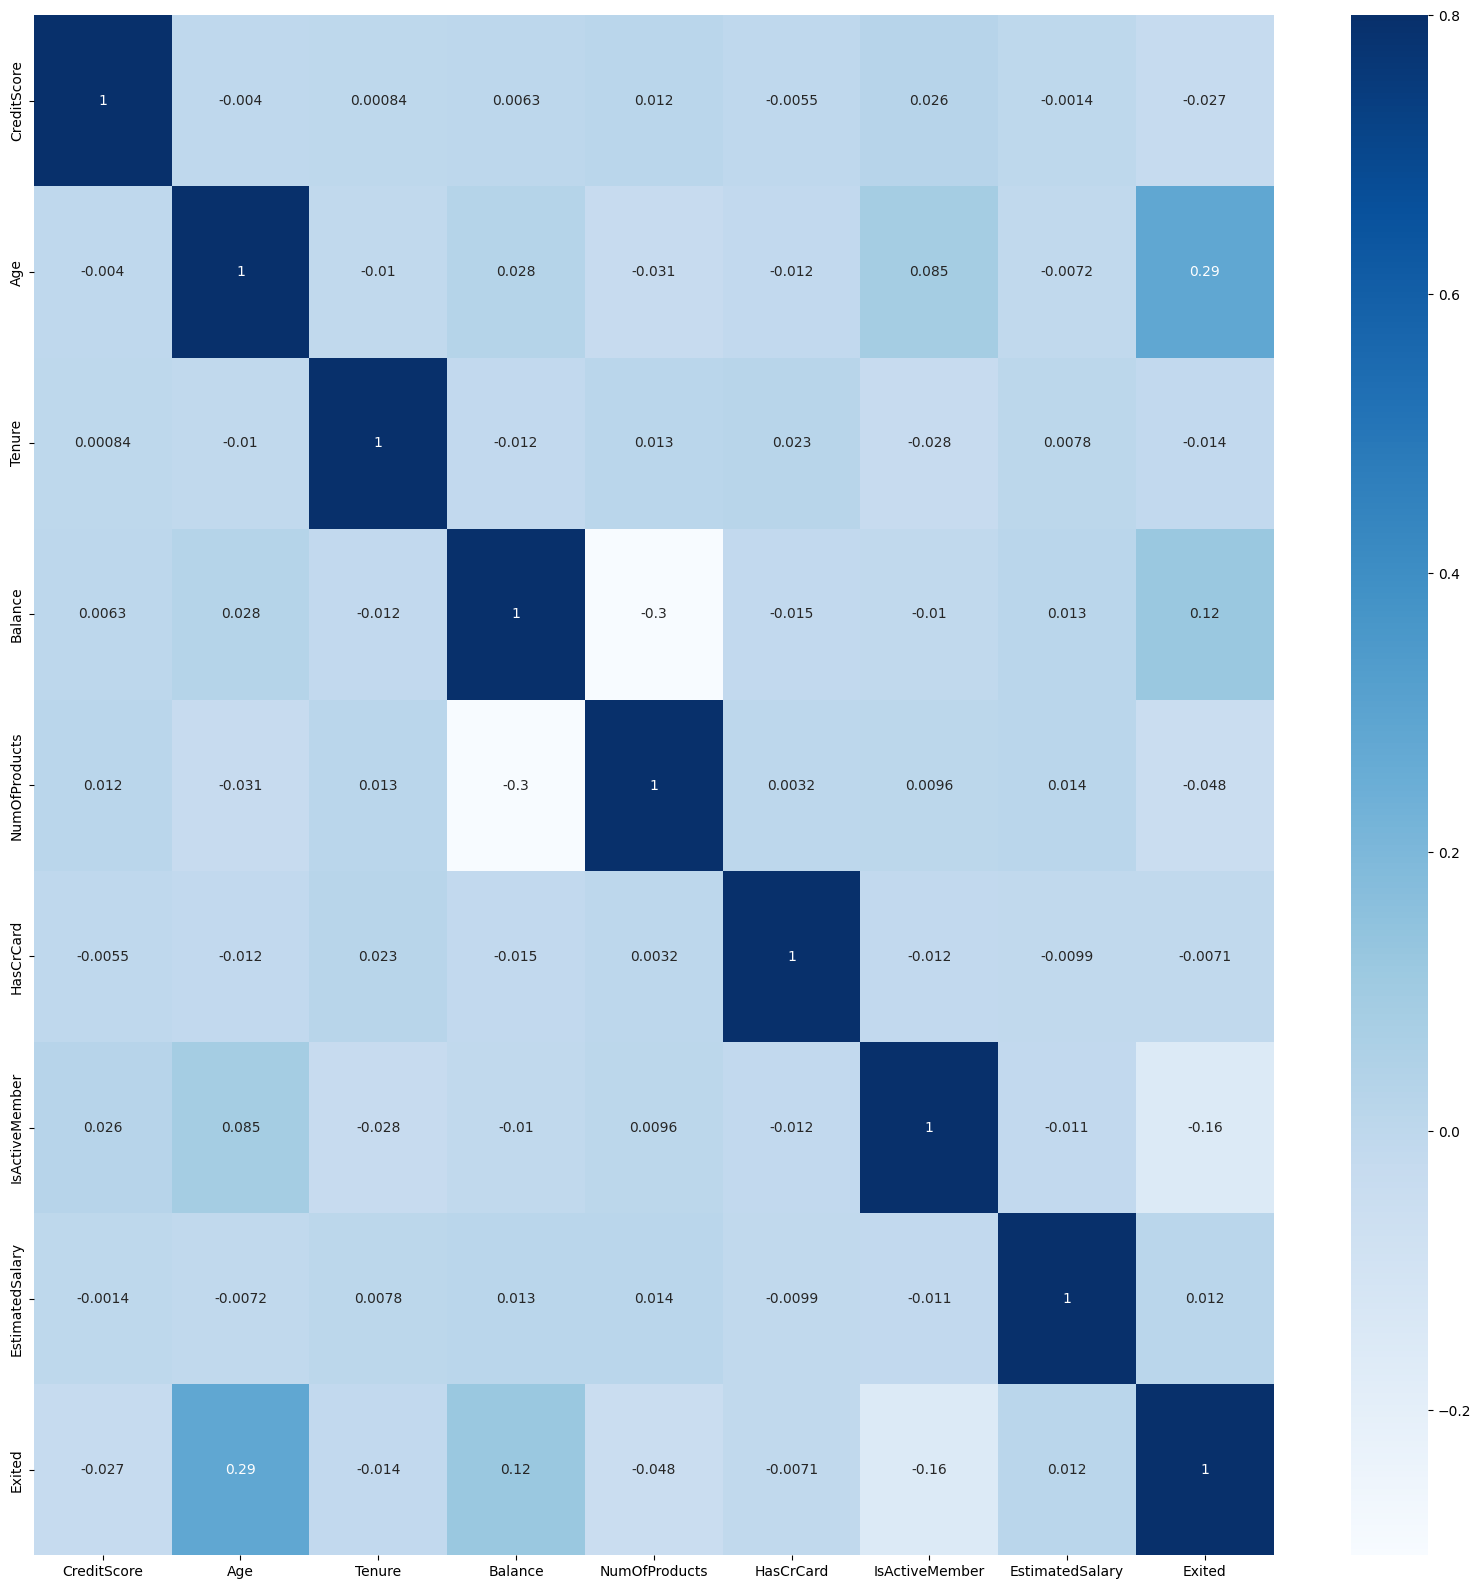

In [13]:
##Plotting the heatmap
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, vmax = .8, annot = True, cmap = 'Blues')
#It looks like Age, Balance and 'IsActiveMember' are the most correlated variables with Exited.

<AxesSubplot: xlabel='Tenure', ylabel='count'>

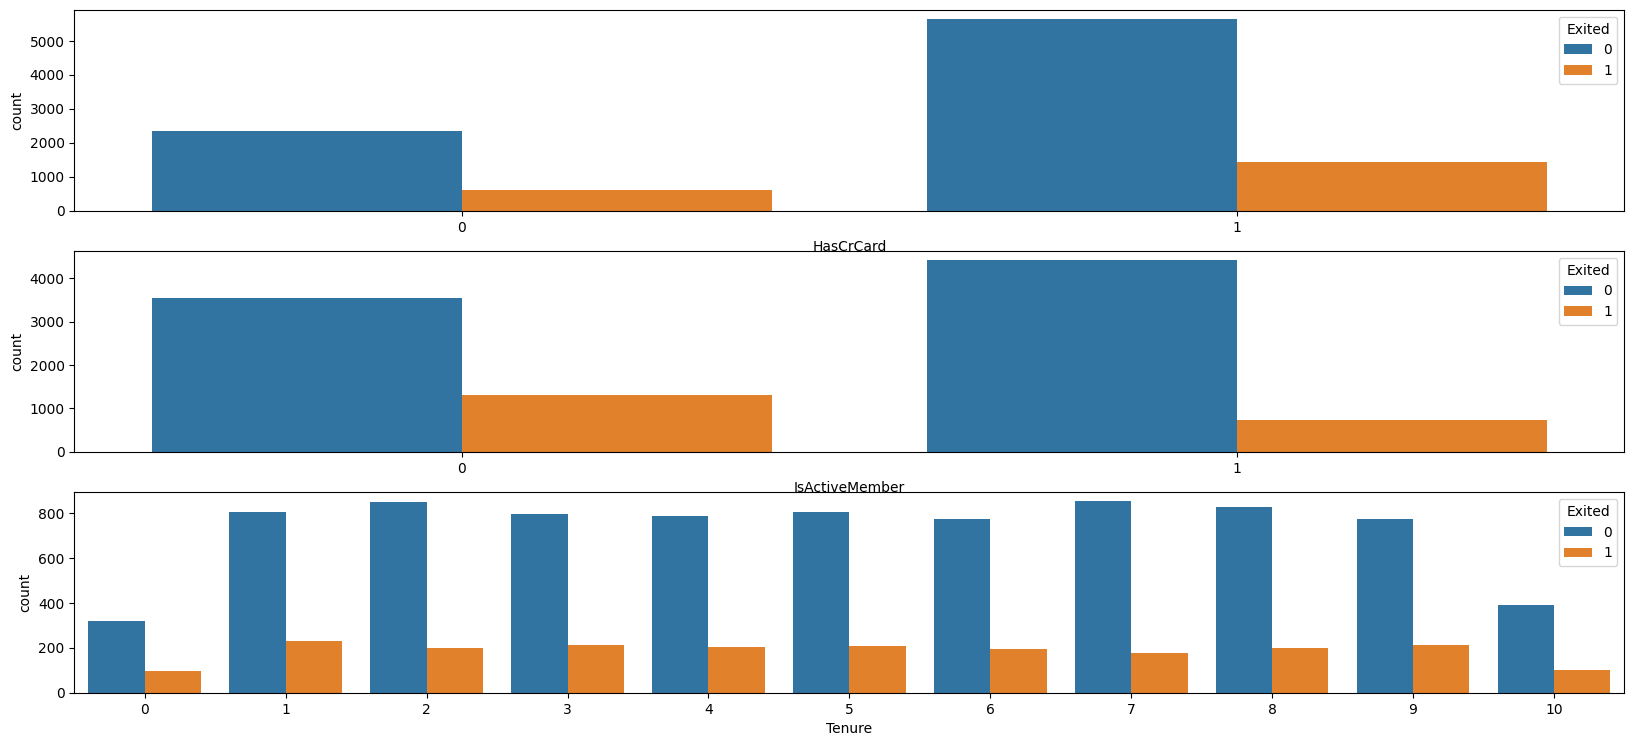

In [14]:
## Analyzing other variables
plt.figure(figsize=(20,12))
plt.subplot(411)
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df_churn)

plt.subplot(412)
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df_churn)

plt.subplot(413)
sns.countplot(x = 'Tenure', hue = 'Exited', data = df_churn)

<AxesSubplot: xlabel='Geography', ylabel='count'>

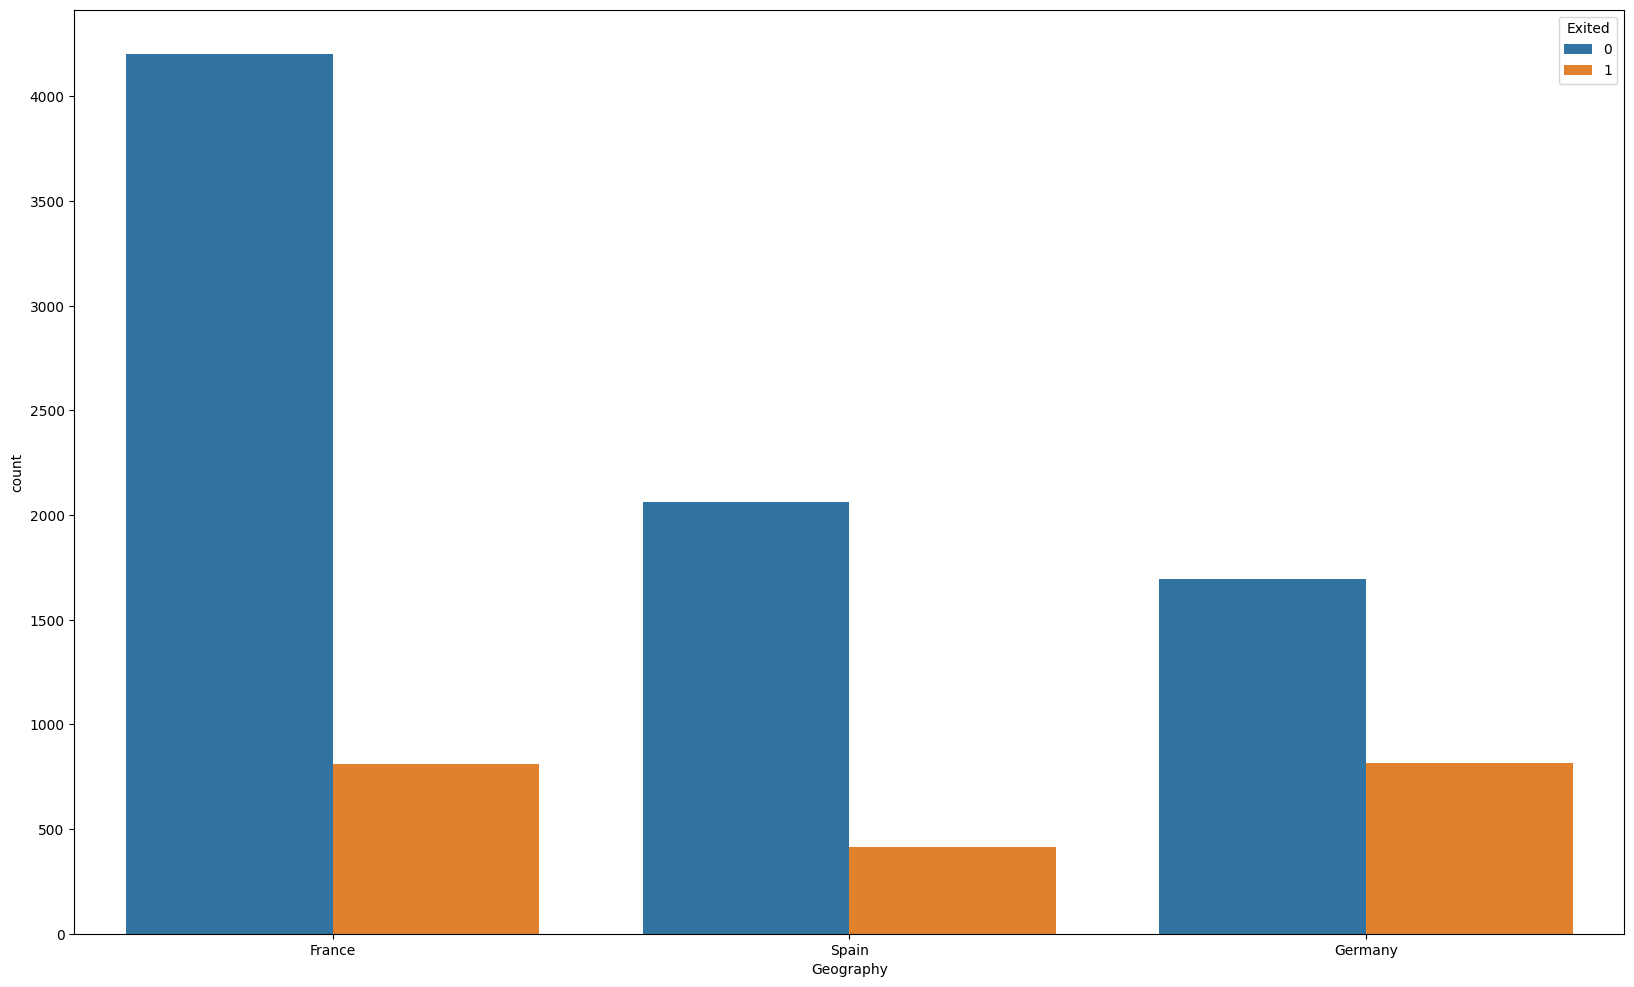

In [15]:
## Geographic distribution of customers
plt.figure(figsize=(20,12))
sns.countplot(x = 'Geography', hue = 'Exited', data = df_churn)

## We have more people from France, but people from Germany left more than the others.

C:\Users\User\AppData\Local\Temp\ipykernel_45676\1422544717.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_churn[df_churn['Exited']==1]['EstimatedSalary'], label = 'People who exited', color = 'r', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_45676\1422544717.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_churn[df_churn['Exited']==0]['EstimatedSalary'], label = 'People who stayed', color = 'b', shade=True)


Text(0.5, 0, 'EstimatedSalary')

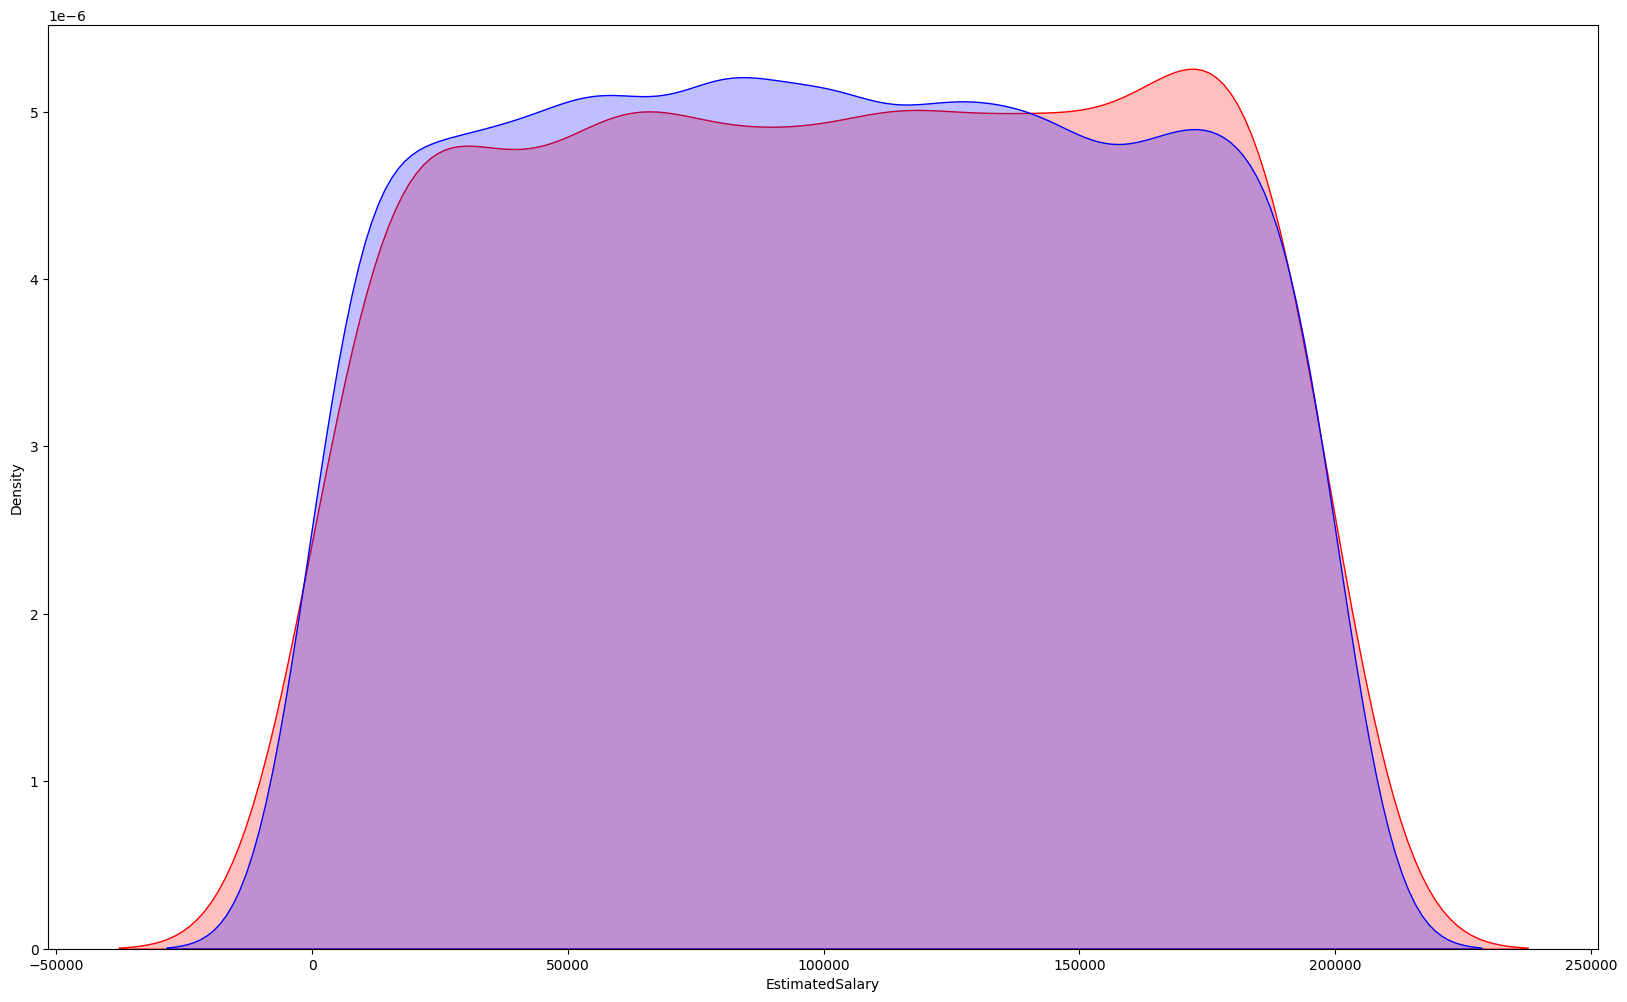

In [16]:
## Probabilitcal distribution of salary
plt.figure(figsize=(20,12))
sns.kdeplot(df_churn[df_churn['Exited']==1]['EstimatedSalary'], label = 'People who exited', color = 'r', shade=True)
sns.kdeplot(df_churn[df_churn['Exited']==0]['EstimatedSalary'], label = 'People who stayed', color = 'b', shade=True)

plt.xlabel('EstimatedSalary')

## Feature Engineering Part

In [17]:
#We can use OneHotEncoder to transform categorical variables into numerical variables.
oneHot = OneHotEncoder()
X_num = df_churn.drop(['Gender', 'Geography'], axis = 1)
X_categorical = oneHot.fit_transform(df_churn[['Gender', 'Geography'] ]).toarray()
X_cat = pd.DataFrame(X_categorical)

In [18]:
X_all = pd.concat([X_cat, X_num], axis = 1)

In [19]:
X_all.head()

,0,1,2,3,4,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,1.0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88,1
1,1.0,0.0,0.0,0.0,1.0,608,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,1.0,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,1.0,0.0,0.0,699,39,1,0.00,2,0,0,93826.63,0
4,1.0,0.0,0.0,0.0,1.0,850,43,2,125510.82,1,1,1,79084.10,0


In [20]:
## y is the target variable
y = df_churn['Exited']
##Drop y from X_all
X_all = X_all.drop(['Exited'], axis = 1)

In [21]:
## Scale the data
scaler = MinMaxScaler()
X_all = scaler.fit_transform(X_all)

c:\Users\User\anaconda3\envs\fastapi\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\envs\fastapi\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [22]:
## Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.3, random_state = 0)

In [23]:
##logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [24]:
## Evaluate the model
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(100* accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 80.97%


<AxesSubplot: >

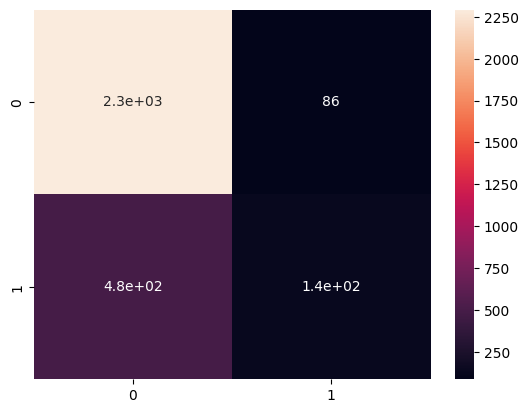

In [25]:
## Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [26]:
## Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2379
           1       0.61      0.22      0.32       621

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.61      3000
weighted avg       0.78      0.81      0.77      3000



In [27]:
## We can try with another model
# Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [28]:
## Evaluation of the Random Forest model
print('Accuracy of random forest classifier on test set: {:.2f}%'.format(100* accuracy_score(y_test, y_pred)))

Accuracy of random forest classifier on test set: 86.70%


<AxesSubplot: >

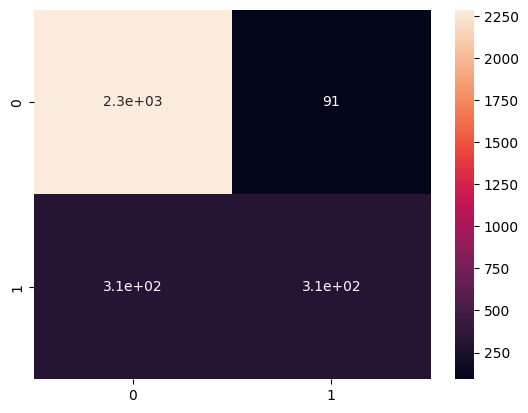

In [29]:
##Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [30]:
## Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.77      0.50      0.61       621

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.77      3000
weighted avg       0.86      0.87      0.86      3000



In [31]:
## At the moment, Random Forest is the best model.
## We can try with another model: XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [32]:
predictions = model.predict(X_test)

In [33]:
## Evaluation of this model
print('Accuracy of XGBoost classifier on test set: {:.2f}%'.format(100* accuracy_score(y_test, predictions)))

Accuracy of XGBoost classifier on test set: 86.00%


<AxesSubplot: >

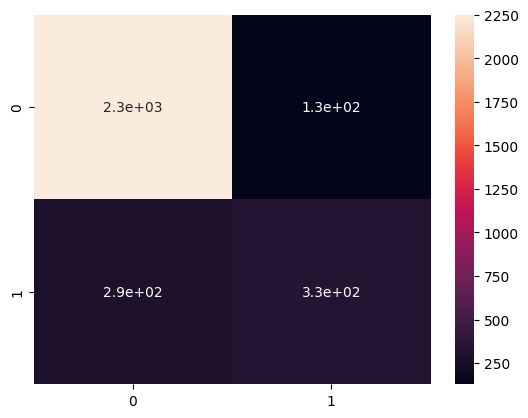

In [34]:
## Confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

In [35]:
## Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      2379
           1       0.72      0.53      0.61       621

    accuracy                           0.86      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000



## Conclusions
I tested three models:
- Logistic Regression
- Random Forest
- XGBoost

| Values | Model               | Precision | Recall | f1-score |
|--------|---------------------|-----------|--------|----------|
| 0      | Logistic Regression | 0.83      | 0.96   | 0.89     |
| 1      | Logistic Regression | 0.61      | 0.22   | 0.32     |
| 0      | Random Forest       | 0.88      | 0.96   | 0.92     |
| 1      | Random Forest       | 0.77      | 0.50   | 0.61     |
| 0      | XGBoost             | 0.89      | 0.95   | 0.91     |
| 1      | XGBoost             | 0.72      | 0.53   | 0.61     |

**Random Forest** and **XGBoost** have performed better than **Logistic Regression** and they have the same f1-score.

## Pipeline 

In [36]:
## I think I might have to try with another approach to improve the model for the future.

df = pd.read_csv('../datasets/Churn_Modelling.csv')
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)


categorical = ['Geography', 'Gender']
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

##Divide the df into df_train and df_test
df_train_all, df_test = train_test_split(df, test_size = 0.3, random_state = 0)

##Obtain y values 
y_train_all = df_train_all.Exited.astype(int).values
y_test = df_test.Exited.astype(int).values

##Training model 
df_train, df_val = train_test_split(df_train_all, test_size = 0.3, random_state = 0)
y_train = df_train.Exited.astype(int).values
y_val = df_val.Exited.astype(int).values

##Use Dict Vectorizer to transform categorical variables into numerical variables
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


In [37]:
## Use RandomForest to train the model
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
## Transform validation set into numerical variables
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

y_pred = rf.predict_proba(X_val)[:,1]

In [39]:
## Roc Auc Score
roc_auc_score(y_val, y_pred)

0.842737449589765

In [40]:
## Let's make the pipeline
from sklearn.pipeline import make_pipeline

Pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestClassifier(n_estimators = 100, random_state = 0)
)

In [41]:
Pipeline.fit(train_dicts, y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

In [42]:
## Test our Pipeline
y_pred = Pipeline.predict_proba(val_dicts)[:,1]

## Evaluate the model
roc_auc_score(y_val, y_pred)

0.842737449589765

## Saving the model 

In [44]:
import pickle
with open ('../models/pipeline.bin', 'wb' ) as f_out: 
    pickle.dump(Pipeline, f_out)

## Testing the model 

In [45]:
df_test.iloc[0].to_dict()

{'CreditScore': 597,
 'Geography': 'Germany',
 'Gender': 'Female',
 'Age': 35,
 'Tenure': 8,
 'Balance': 131101.04,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 192852.67,
 'Exited': 0}

In [46]:
customer = {'CreditScore': 597,
 'Geography': 'Germany',
 'Gender': 'Female',
 'Age': 35,
 'Tenure': 8,
 'Balance': 131101.04,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 192852.67,
 'Exited': 0}

In [47]:
Pipeline.predict_proba(customer)[0,1]

0.4

In [48]:
import json
print(json.dumps(customer, indent = 2))

{
  "CreditScore": 597,
  "Geography": "Germany",
  "Gender": "Female",
  "Age": 35,
  "Tenure": 8,
  "Balance": 131101.04,
  "NumOfProducts": 1,
  "HasCrCard": 1,
  "IsActiveMember": 1,
  "EstimatedSalary": 192852.67,
  "Exited": 0
}
